In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
import numpy as np
from numpy import array

import seaborn as sns
import matplotlib.pyplot as plt
import datetime

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import scipy
from scipy import stats,interpolate
from scipy.stats import skew,kurtosis,describe,variation,shapiro,levene,f_oneway
from scipy.special import kl_div
import  scipy.signal.signaltools

def _centered(arr, newsize):
    # Return the center newsize portion of the array.
    newsize = np.asarray(newsize)
    currsize = np.array(arr.shape)
    startind = (currsize - newsize) // 2
    endind = startind + newsize
    myslice = [slice(startind[k], endind[k]) for k in range(len(endind))]
    return arr[tuple(myslice)]

scipy.signal.signaltools._centered = _centered

import warnings 
warnings.filterwarnings(action='ignore')

import optuna
from optuna.integration import XGBoostPruningCallback
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import GridSearchCV,cross_validate
from sklearn import model_selection
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score, StratifiedKFold, KFold 
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,AdaBoostClassifier,IsolationForest,StackingClassifier
from sklearn.metrics import accuracy_score,balanced_accuracy_score,precision_score,recall_score,confusion_matrix,f1_score,fbeta_score,roc_auc_score,classification_report,make_scorer,balanced_accuracy_score
from mlxtend.classifier import StackingClassifier,StackingCVClassifier
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,MinMaxScaler,RobustScaler,Binarizer

from imblearn.over_sampling import SMOTE,ADASYN,BorderlineSMOTE,SVMSMOTE
from imblearn.combine import SMOTEENN,SMOTETomek
from imblearn.under_sampling import RandomUnderSampler

import random
import tensorflow 
import tensorflow as tf

random.seed(1234)
np.random.seed(1234)
tf.random.set_seed(1234)

from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.optimizers import *
from tensorflow.keras import backend as K

import warnings 
warnings.filterwarnings(action='ignore')

In [2]:
def describex(data):
        data = pd.DataFrame(data)
        stats = data.describe()
        skewness = data.skew()
        kurtosis = data.kurtosis()
        skewness_df = pd.DataFrame({'skewness':skewness}).T
        kurtosis_df = pd.DataFrame({'kurtosis':kurtosis}).T
        Appended_Stats = pd.concat([stats,skewness_df,kurtosis_df],axis=0)
        return Appended_Stats

In [3]:
def get_clf_eval(y_test,pred=None,pred_proba=None):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    roc_auc = roc_auc_score(y_test,pred_proba)
    f1 = f1_score(y_test,pred)
    f2 = fbeta_score(y_test,pred,beta=2)
    balanced_acc = balanced_accuracy_score(y_test,pred)
    print('Confusion Matrix')
    print(confusion)
    print('\n')
    print('정확도:',accuracy.round(3),'정밀도:', precision.round(3),'재현율:',recall.round(3),'AUC:',roc_auc.round(3),'F1:',f1.round(3),'F2:',f2.round(3),'Balanced_Accuracy:',balanced_acc.round(3))

In [4]:
def get_eval_by_threshold(y_test,pred_proba_c1,thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임계값',custom_threshold)
        get_clf_eval(y_test,custom_predict,pred_proba_c1)
        print('\n')

In [5]:
#한글폰트 적용
import matplotlib.font_manager as fm
path = 'C:/Windows/Fonts/gulim.ttc'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

In [6]:
#### one hot 적용해보기 

In [7]:
LoadData = pd.read_csv('train.csv').head()
LoadData

PRODUCT_ID  Y_Class  Y_Quality        TIMESTAMP     LINE PRODUCT_CODE  X_1  \
0  TRAIN_000        1   0.533433  2022-06-13 5:14  T050304         A_31  NaN   
1  TRAIN_001        2   0.541819  2022-06-13 5:22  T050307         A_31  NaN   
2  TRAIN_002        1   0.531267  2022-06-13 5:30  T050304         A_31  NaN   
3  TRAIN_003        2   0.537325  2022-06-13 5:39  T050307         A_31  NaN   
4  TRAIN_004        1   0.531590  2022-06-13 5:47  T050304         A_31  NaN   

   X_2  X_3  X_4  X_5  X_6  X_7  X_8  X_9  X_10  X_11  X_12  X_13  X_14  X_15  \
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   X_16  X_17  X_18  X_19  X_20  X_21  X_22  X_23  X_24  X_25  X_26  X_27  \
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   X_28  X_29  X_30  X_31  X_32  X_33  X_34  X_35  X_36  X_37  X_38  X_39  \
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   X_40  X_41  X_42  X_43  X_44  X_45  X_46  X_47  X_48  X_49  X_50  X_51  \
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   X_52  X_53  X_54  X_55  X_56  X_57  X_58  X_59  X_60  X_61  X_62  X_63  \
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   X_64  X_65  X_66  X_67  X_68  X_69  X_70  X_71  X_72  X_73  X_74  X_75  \
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   X_76  X_77  X_78  X_79  X_80  X_81  X_82  X_83  X_84  X_85  X_86  X_87  \
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   X_88  X_89  X_90  X_91  X_92  X_93  X_94  X_95  X_96  X_97  X_98  X_99  \
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2   NaN   NaN   NaN   NaN

### 1.)  Classification Y_Class

#### Y-Class
- 0 : 적정 기준 미달 
- 1 : 적합
- 2 : 적정 기준 초과 

In [8]:
#### Train Data
data = pd.read_csv('train.csv')
data = data.drop(['Y_Quality'],axis=1) 

data_copy = data.copy()
data_copy['Y_Class'] = data_copy['Y_Class'].replace({0:1, 2:1, 1:0})

#data_object = data.select_dtypes(include='object')
#data_inputs = data.select_dtypes(include=[int,float]).fillna(data.select_dtypes(include=[int,float]).mean()).dropna(axis=1)
#data_inputs = data.select_dtypes(include=[int,float]).fillna(0) 

data = data.fillna(0)

#data = pd.concat([data_object,data_inputs],axis=1)
ids = data.nunique().values>1 # 획일값 제거 
data = data.loc[:,ids]

# 적정기준 미달 & 적정기준 초과 통합 
data['Y_Class'] = data['Y_Class'].replace({0:1, 2:1, 1:0})
print(data.shape)
print('\n')
print('제품번호 구분\n',data['PRODUCT_CODE'].value_counts())
print('\n')
print('PRODUCT_CODE = T_31\n',data[data['PRODUCT_CODE']== 'T_31']['Y_Class'].value_counts())
print('\n')
print('PRODUCT_CODE = A_31\n',data[data['PRODUCT_CODE']== 'A_31']['Y_Class'].value_counts())
print('\n')
print('PRODUCT_CODE = 0_31\n',data[data['PRODUCT_CODE']== 'O_31']['Y_Class'].value_counts())

(598, 2599)


제품번호 구분
 PRODUCT_CODE
T_31    343
A_31    249
O_31      6
Name: count, dtype: int64


PRODUCT_CODE = T_31
 Y_Class
0    285
1     58
Name: count, dtype: int64


PRODUCT_CODE = A_31
 Y_Class
1    131
0    118
Name: count, dtype: int64


PRODUCT_CODE = 0_31
 Y_Class
0    4
1    2
Name: count, dtype: int64


In [9]:
#### Test Data
#test = pd.read_csv('test.csv')

#test = test[data.drop(['Y_Class'],axis=1).columns]

#print(test.shape)
#print('\n')
#print('제품번호 구분\n',test['PRODUCT_CODE'].value_counts())

#### 전처리 

In [10]:
oh = OneHotEncoder()
encoder = oh.fit_transform(data['PRODUCT_CODE'].values.reshape(-1,1)).toarray() 
df_OneHot = pd.DataFrame(encoder, columns=['PRODUCT_CODE_' + str(oh.categories_[0][i]) for i in range (len(oh.categories_[0]))])

In [11]:
Feature_Selection = True

In [12]:
def Train_Test_Split(Feature_Selection):
    
    Data = data
    Target = 'Y_Class' # 예측변수 Y 

    Input_Data = Data.select_dtypes(include=[int,float]).drop([Target],axis=1) # 입력변수 X 
    Input_Data = Input_Data.loc[:,Input_Data.nunique().values>1] # 획일값 제거 
    
    X = Input_Data
    y = Data['Y_Class']
    
    if Feature_Selection == False:
        
        #X = pd.concat([X,df_OneHot],axis=1)

        X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=2021)
        
        ros_test = RandomUnderSampler(sampling_strategy=0.8,random_state=2021)   
        X_test,y_test = ros_test.fit_resample(X_test,y_test)    

        return X_train, y_train, X_test, y_test
    
    if Feature_Selection == True:
        
        X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=2021)
        Train = pd.concat([X_train,y_train],axis=1)
        Pass = Train[Train['Y_Class']==0].drop(['Y_Class'],axis=1)
        Fail = Train[Train['Y_Class']==1].drop(['Y_Class'],axis=1)

        T_Test = stats.ttest_ind(Pass,Fail,equal_var=False) # equal_var=True
        Columns = pd.DataFrame(X_train.columns).rename(columns={0:'Columns'})
        P_Value = pd.DataFrame(T_Test[1]).rename(columns={0:'P-Value'})
        Concat_columns_pvalues = pd.concat([Columns,P_Value],axis=1).dropna()

        Significant_Values = Concat_columns_pvalues[Concat_columns_pvalues['P-Value'] < 0.05]['Columns'].to_list()
        df_ttest = Data[Significant_Values]
        
        #df_ttest_addcat = pd.concat([df_ttest, df_OneHot], axis=1)

        X_train,X_test,y_train,y_test = train_test_split(df_ttest,y,test_size=0.1,random_state=2021)
        
        ros_test = RandomUnderSampler(sampling_strategy=0.8,random_state=2021)   
        X_test,y_test = ros_test.fit_resample(X_test,y_test)    

        return X_train, y_train, X_test, y_test 
    
X_train, y_train, X_test, y_test = Train_Test_Split(Feature_Selection)
X_train.shape, X_test.shape

((538, 2449), (42, 2449))

In [13]:
y_train.value_counts(),y_test.value_counts()

(Y_Class
 0    366
 1    172
 Name: count, dtype: int64,
 Y_Class
 0    23
 1    19
 Name: count, dtype: int64)

In [14]:
def TrainTest_FillNA_Stat():

    Data = data_copy[data.columns]
    Target = 'Y_Class' # 예측변수 Y 

    Input_Data = Data.select_dtypes(include=[int,float]).drop([Target],axis=1) # 입력변수 X 
    Input_Data = Input_Data.loc[:,Input_Data.nunique().values>1] # 획일값 제거 

    X = Input_Data
    y = Data['Y_Class']

    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=2021)

    X_train = X_train.select_dtypes(include=[int,float]).fillna(data.select_dtypes(include=[int,float]).mean()).dropna(axis=1)
    X_test = X_test.select_dtypes(include=[int,float]).fillna(data.select_dtypes(include=[int,float]).mean()).dropna(axis=1)

    Train = pd.concat([X_train,y_train],axis=1)
    Pass = Train[Train['Y_Class']==0].drop(['Y_Class'],axis=1)
    Fail = Train[Train['Y_Class']==1].drop(['Y_Class'],axis=1)

    T_Test = stats.ttest_ind(Pass,Fail,equal_var=False) # equal_var=True
    Columns = pd.DataFrame(X_train.columns).rename(columns={0:'Columns'})
    P_Value = pd.DataFrame(T_Test[1]).rename(columns={0:'P-Value'})
    Concat_columns_pvalues = pd.concat([Columns,P_Value],axis=1).dropna()

    Significant_Values = Concat_columns_pvalues[Concat_columns_pvalues['P-Value'] < 0.05]['Columns'].to_list()

    X_train = X_train[Significant_Values]
    X_test = X_test[Significant_Values]

    ros_test = RandomUnderSampler(sampling_strategy=0.8,random_state=2021)   
    X_test,y_test = ros_test.fit_resample(X_test,y_test)    

    return X_train, y_train, X_test, y_test 


X_train, y_train, X_test, y_test  = TrainTest_FillNA_Stat()

X_train.shape, X_test.shape

((538, 2215), (42, 2215))

In [15]:
# 활용할 ML 나열 
rf = RandomForestClassifier(random_state=2021)
rf_bal = RandomForestClassifier(random_state=2021,class_weight='balanced')
ada = AdaBoostClassifier(random_state=2021)
gbm = GradientBoostingClassifier(random_state=2021)
xgb = XGBClassifier(random_state=2021)
xgb_bal = XGBClassifier(random_state=2021,scale_pos_weight=y_train.value_counts()[0]/y_train.value_counts()[1])
lgbm =  LGBMClassifier(random_state=2021)
lgbm_bal = LGBMClassifier(random_state=2021,scale_pos_weight=y_train.value_counts()[0]/y_train.value_counts()[1]) 

models = [rf,rf_bal,ada,gbm,xgb,xgb_bal,lgbm,lgbm_bal]

#### ML 

In [16]:
def test_model(model,Fillna):
    
    if Fillna == 0:
        
        X_train, y_train, X_test, y_test = Train_Test_Split(Feature_Selection)
        
    if Fillna == 'Stat':
        
        X_train, y_train, X_test, y_test  = TrainTest_FillNA_Stat()
    
    ml = model
    ml.fit(X_train,y_train)      
    pred = ml.predict(X_test)
    pred_proba = ml.predict_proba(X_test)[:,1]
    print('----------------------------------------------------------------------------------------------------------')
    get_clf_eval(y_test,pred,pred_proba)  
    print('\n')
    print(classification_report(y_test, pred,target_names=['양품','불량']))
    
    if model == rf:
        print('RandomForest Prediction Result')
        print('\n')
        
    elif model == rf_bal:
        print('RandomForest(Balanced Weight) Prediction Result')
        print('\n')  
        
    elif model == ada:
        print('AdaBoost Prediction Result')
        print('\n')
     
    elif model == gbm:
        print('GradientBoostingMachine Prediction Result')
        print('\n')
        
    elif model == xgb:
        print('XGBoost Prediction Result')
        print('\n')
        
    elif model == xgb_bal:
        print('XGBoost(Balanced Weight) Prediction Result')
        print('\n')    
        
    elif model == lgbm:
        print('LightGBM Prediction')
        print('\n')   
        
    elif model == lgbm_bal:
        print('LightGBM(Balanced Weight) Prediction Result')

In [17]:
# 전체 모델  원큐 출력 
#for i in range(0,len(models)):

#    model = models[i]
#    test_model(model,Fillna=0)

In [18]:
# 전체 모델  원큐 출력 
#for i in range(0,len(models)):

#    model = models[i]
#    test_model(model,Fillna='Stat')

In [19]:
def Hybrid_Sampling_Test(model,Fillna):
    
    if Fillna == 0:
        
        X_train, y_train, X_test, y_test = Train_Test_Split(Feature_Selection)
        
    if Fillna == 'Stat':
        
        X_train, y_train, X_test, y_test  = TrainTest_FillNA_Stat()

    for i in list(np.arange(0.65,1.05,0.05).round(2)): # sampling_strategy = 0.65, 0.7 , 0.75, 0.8 ,0.85, 0.9, 0.95, 1.0
        oversampler = SMOTEENN(sampling_strategy=i,random_state=2021)
        X_train_over,y_train_over = oversampler.fit_resample(X_train,y_train)
        ml = model
        ml.fit(X_train_over,y_train_over) 
        pred = ml.predict(X_test)
        pred_proba = ml.predict_proba(X_test)[:,1]
        get_clf_eval(y_test,pred,pred_proba)  
        print('\n')
        print(classification_report(y_test, pred,target_names=['양품','불량']))
        
        if model == rf:
            print('RandomForest SMOTEENN'+'='+str(i),'Prediction Result')
            print('------------------------------------------------------------------------------------------------------')
            print('\n')
            
        elif model == rf_bal:
            print('RandomForest(Balanced Weight) SMOTEENN'+'='+str(i),'Prediction Result')
            print('------------------------------------------------------------------------------------------------------')
            print('\n')    

        elif model == ada:
            print('AdaBoost SMOTEENN'+'='+str(i),'Prediction Result')
            print('------------------------------------------------------------------------------------------------------')
            print('\n')

        elif model == gbm:
            print('GradientBoostingMachine SMOTEENN'+'='+str(i),'Prediction Result')
            print('------------------------------------------------------------------------------------------------------')
            print('\n')

        elif model == xgb:
            print('XGBoost SMOTEENN'+'='+str(i),'Prediction Result')
            print('------------------------------------------------------------------------------------------------------')
            print('\n')
            
        elif model == xgb_bal:
            print('XGBoost(Balanced Weight) SMOTEENN'+'='+str(i),'Prediction Result')
            print('------------------------------------------------------------------------------------------------------')
            print('\n')    


        elif model == lgbm:
            print('LightGBM SMOTEENN'+'='+str(i),'Prediction Result')
            print('------------------------------------------------------------------------------------------------------')
            print('\n')   
            
        elif model == lgbm_bal:
            print('LightGBM(Balanced Weight) SMOTEENN'+'='+str(i),'Prediction Result')
            print('------------------------------------------------------------------------------------------------------')
            print('\n')          
            
models = [rf,rf_bal,ada,gbm,xgb,xgb_bal,lgbm,lgbm_bal]

In [20]:
#Hybrid_Sampling_Test(models[0],Fillna=0) # Input_Data, df_ttest, df_L1Penalty

In [21]:
#Hybrid_Sampling_Test(models[0],Fillna='Stat')

In [22]:
#Hybrid_Sampling_Test(models[1],Fillna=0) 

In [23]:
Hybrid_Sampling_Test(models[1],Fillna='Stat') 

Confusion Matrix
[[20  3]
 [ 6 13]]


정확도: 0.786 정밀도: 0.812 재현율: 0.684 AUC: 0.847 F1: 0.743 F2: 0.707 Balanced_Accuracy: 0.777


              precision    recall  f1-score   support

          양품       0.77      0.87      0.82        23
          불량       0.81      0.68      0.74        19

    accuracy                           0.79        42
   macro avg       0.79      0.78      0.78        42
weighted avg       0.79      0.79      0.78        42

RandomForest(Balanced Weight) SMOTEENN=0.65 Prediction Result
------------------------------------------------------------------------------------------------------


Confusion Matrix
[[18  5]
 [ 6 13]]


정확도: 0.738 정밀도: 0.722 재현율: 0.684 AUC: 0.815 F1: 0.703 F2: 0.691 Balanced_Accuracy: 0.733


              precision    recall  f1-score   support

          양품       0.75      0.78      0.77        23
          불량       0.72      0.68      0.70        19

    accuracy                           0.74        42
   macro avg       0.74      0

In [24]:
#Hybrid_Sampling_Test(models[2],Fillna=0)

In [25]:
#Hybrid_Sampling_Test(models[2],Fillna='Stat') 

In [26]:
#Hybrid_Sampling_Test(models[3],Fillna=0) 

In [27]:
#Hybrid_Sampling_Test(models[3],Fillna='Stat') 

In [28]:
#Hybrid_Sampling_Test(models[4],Fillna=0) 

In [29]:
#Hybrid_Sampling_Test(models[4],Fillna='Stat') 

In [30]:
#Hybrid_Sampling_Test(models[5],Fillna=0) 

In [31]:
#Hybrid_Sampling_Test(models[5],Fillna='Stat') 

In [32]:
#Hybrid_Sampling_Test(models[6],Fillna=0) 

In [33]:
Hybrid_Sampling_Test(models[6],Fillna='Stat') 

Confusion Matrix
[[20  3]
 [ 5 14]]


정확도: 0.81 정밀도: 0.824 재현율: 0.737 AUC: 0.812 F1: 0.778 F2: 0.753 Balanced_Accuracy: 0.803


              precision    recall  f1-score   support

          양품       0.80      0.87      0.83        23
          불량       0.82      0.74      0.78        19

    accuracy                           0.81        42
   macro avg       0.81      0.80      0.81        42
weighted avg       0.81      0.81      0.81        42

LightGBM SMOTEENN=0.65 Prediction Result
------------------------------------------------------------------------------------------------------


Confusion Matrix
[[19  4]
 [ 5 14]]


정확도: 0.786 정밀도: 0.778 재현율: 0.737 AUC: 0.817 F1: 0.757 F2: 0.745 Balanced_Accuracy: 0.781


              precision    recall  f1-score   support

          양품       0.79      0.83      0.81        23
          불량       0.78      0.74      0.76        19

    accuracy                           0.79        42
   macro avg       0.78      0.78      0.78        4

In [34]:
#Hybrid_Sampling_Test(models[7],Fillna=0) 

In [35]:
#Hybrid_Sampling_Test(models[7],Fillna='Stat') 

In [36]:
def Undersampling_Test(model,Fillna):
    
    if Fillna == 0:
        
        X_train, y_train, X_test, y_test = Train_Test_Split(Feature_Selection)
        
    if Fillna == 'Stat':
        
        X_train, y_train, X_test, y_test  = TrainTest_FillNA_Stat()

    for i in list(np.arange(0.65,1.05,0.05).round(2)): # sampling_strategy = 0.65, 0.7 , 0.75, 0.8 ,0.85, 0.9, 0.95, 1.0
        undersampler = RandomUnderSampler(sampling_strategy=i,random_state=2021)   
        X_train_under,y_train_under = undersampler.fit_resample(X_train,y_train)
        ml = model
        ml.fit(X_train_under,y_train_under) 
        pred = ml.predict(X_test)
        pred_proba = ml.predict_proba(X_test)[:,1]
        get_clf_eval(y_test,pred,pred_proba)  
        print('\n')
        print(classification_report(y_test, pred,target_names=['양품','불량']))
        
        if model == rf:
            print('RandomForest SMOTEENN'+'='+str(i),'Prediction Result')
            print('------------------------------------------------------------------------------------------------------')
            print('\n')
            
        elif model == rf_bal:
            print('RandomForest(Balanced Weight) SMOTEENN'+'='+str(i),'Prediction Result')
            print('------------------------------------------------------------------------------------------------------')
            print('\n')    

        elif model == ada:
            print('AdaBoost SMOTEENN'+'='+str(i),'Prediction Result')
            print('------------------------------------------------------------------------------------------------------')
            print('\n')

        elif model == gbm:
            print('GradientBoostingMachine SMOTEENN'+'='+str(i),'Prediction Result')
            print('------------------------------------------------------------------------------------------------------')
            print('\n')

        elif model == xgb:
            print('XGBoost SMOTEENN'+'='+str(i),'Prediction Result')
            print('------------------------------------------------------------------------------------------------------')
            print('\n')
            
        elif model == xgb_bal:
            print('XGBoost(Balanced Weight) SMOTEENN'+'='+str(i),'Prediction Result')
            print('------------------------------------------------------------------------------------------------------')
            print('\n')    


        elif model == lgbm:
            print('LightGBM SMOTEENN'+'='+str(i),'Prediction Result')
            print('------------------------------------------------------------------------------------------------------')
            print('\n')   
            
        elif model == lgbm_bal:
            print('LightGBM(Balanced Weight) SMOTEENN'+'='+str(i),'Prediction Result')
            print('------------------------------------------------------------------------------------------------------')
            print('\n')          
            
models = [rf,rf_bal,ada,gbm,xgb,xgb_bal,lgbm,lgbm_bal]

In [37]:
#Undersampling_Test(models[0],Fillna=0)

In [38]:
#Undersampling_Test(models[0],Fillna='Stat')

In [39]:
#Undersampling_Test(models[1],Fillna=0)

In [40]:
#Undersampling_Test(models[1],Fillna='Stat')

In [41]:
#Undersampling_Test(models[2],Fillna=0)

In [42]:
#Undersampling_Test(models[2],Fillna='Stat')

In [43]:
#Undersampling_Test(models[3],Fillna=0)

In [44]:
#Undersampling_Test(models[3],Fillna='Stat')

In [45]:
#Undersampling_Test(models[4],Fillna=0)

In [46]:
#Undersampling_Test(models[4],Fillna='Stat')

In [47]:
Undersampling_Test(models[5],Fillna=0)

Confusion Matrix
[[20  3]
 [ 6 13]]


정확도: 0.786 정밀도: 0.812 재현율: 0.684 AUC: 0.817 F1: 0.743 F2: 0.707 Balanced_Accuracy: 0.777


              precision    recall  f1-score   support

          양품       0.77      0.87      0.82        23
          불량       0.81      0.68      0.74        19

    accuracy                           0.79        42
   macro avg       0.79      0.78      0.78        42
weighted avg       0.79      0.79      0.78        42

XGBoost(Balanced Weight) SMOTEENN=0.65 Prediction Result
------------------------------------------------------------------------------------------------------


Confusion Matrix
[[21  2]
 [ 5 14]]


정확도: 0.833 정밀도: 0.875 재현율: 0.737 AUC: 0.819 F1: 0.8 F2: 0.761 Balanced_Accuracy: 0.825


              precision    recall  f1-score   support

          양품       0.81      0.91      0.86        23
          불량       0.88      0.74      0.80        19

    accuracy                           0.83        42
   macro avg       0.84      0.82    

In [48]:
#Undersampling_Test(models[5],Fillna='Stat')

In [49]:
#Undersampling_Test(models[6],Fillna=0)

In [50]:
#Undersampling_Test(models[6],Fillna='Stat')

In [51]:
#Undersampling_Test(models[7],Fillna=0)

In [52]:
Undersampling_Test(models[7],Fillna='Stat')

Confusion Matrix
[[20  3]
 [ 7 12]]


정확도: 0.762 정밀도: 0.8 재현율: 0.632 AUC: 0.785 F1: 0.706 F2: 0.659 Balanced_Accuracy: 0.751


              precision    recall  f1-score   support

          양품       0.74      0.87      0.80        23
          불량       0.80      0.63      0.71        19

    accuracy                           0.76        42
   macro avg       0.77      0.75      0.75        42
weighted avg       0.77      0.76      0.76        42

LightGBM(Balanced Weight) SMOTEENN=0.65 Prediction Result
------------------------------------------------------------------------------------------------------


Confusion Matrix
[[21  2]
 [ 7 12]]


정확도: 0.786 정밀도: 0.857 재현율: 0.632 AUC: 0.808 F1: 0.727 F2: 0.667 Balanced_Accuracy: 0.772


              precision    recall  f1-score   support

          양품       0.75      0.91      0.82        23
          불량       0.86      0.63      0.73        19

    accuracy                           0.79        42
   macro avg       0.80      0.77   

#### AutoEncoder

In [53]:
def preprocessing(Fillna):
    
    if Fillna == 0:
        
        X_train, y_train, X_test, y_test = Train_Test_Split(Feature_Selection)
        
    if Fillna == 'Stat':
        
        X_train, y_train, X_test, y_test  = TrainTest_FillNA_Stat()
    
    Train_All = pd.concat([X_train,y_train],axis=1)
    X_train_Normal = Train_All[Train_All['Y_Class']==0].drop(['Y_Class'],axis=1)

    scaler = MinMaxScaler()
    scaler.fit(X_train_Normal) # Train Data 기준으로 Train/Test 스케일링 진행 

    X_train_Normal = pd.DataFrame(scaler.transform(X_train_Normal),columns = X_train_Normal.columns)
    X_test = pd.DataFrame(scaler.transform(X_test),columns = X_test.columns)
    
    return X_train_Normal, X_test , y_train ,y_test

X_train_Normal, X_test , y_train ,y_test = preprocessing(Fillna='Stat')

In [54]:
X_train_Normal.shape, X_test.shape

((366, 2215), (42, 2215))

In [55]:
y_train.value_counts(),y_test.value_counts()

(Y_Class
 0    366
 1    172
 Name: count, dtype: int64,
 Y_Class
 0    23
 1    19
 Name: count, dtype: int64)

In [56]:
def build_autoencoder(X,outer,inner,latent_vector,function,dropout_ratio):
    
    random.seed(1234)
    np.random.seed(1234)
    tf.random.set_seed(1234)
    
    input_layer = Input(shape = (X.shape[1],))
    
    encoded = Dense(outer, activation = function,kernel_initializer='random_uniform',bias_initializer='zeros')(input_layer)
    encoded = Dropout(dropout_ratio)(encoded)
    encoded = Dense(inner, activation = function,kernel_initializer='random_uniform',bias_initializer='zeros')(encoded)
    
    encoded = Dense(latent_vector, activation = function)(encoded) 
    
    decoded = Dense(inner, activation = function,kernel_initializer='random_uniform',bias_initializer='zeros')(encoded)
    decoded = Dropout(dropout_ratio)(decoded)
    decoded = Dense(outer, activation = function,kernel_initializer='random_uniform',bias_initializer='zeros')(decoded)
    
    output_layer = Dense(X.shape[1], activation = function,kernel_initializer='random_uniform',bias_initializer='zeros')(decoded)

    autoencoder = Model(input_layer, output_layer)
    autoencoder.compile(optimizer='adam', loss='mse')
    
    return autoencoder

In [57]:
def train_autoencoder(model,X,batch,epoch,val,patience):
    history = model.fit(X, X,
                              batch_size = batch, epochs = epoch, 
                              validation_split = val,callbacks=EarlyStopping(patience=patience))
    
    print('\n')
    sns.set(font_scale=1.0)
    plt.figure(figsize=(6,4))
    plt.grid(True)
    plt.plot(history.history['loss'], label='train loss')
    plt.plot(history.history['val_loss'], label='valid loss')
    plt.legend()
    plt.xlabel('Epoch'); plt.ylabel('loss')
    plt.show()

    return history 

In [58]:
X = X_train_Normal

outer = 64
inner = 32
latent_vector = 16
dropout_ratio = 0.1
function = 'selu'

batch = 20
epoch = 500
val = 0.1
patience = 10

Epoch 1/500
17/17 [==============================] - 3s 156ms/step - loss: 0.1709 - val_loss: 0.0784
Epoch 2/500
17/17 [==============================] - 0s 4ms/step - loss: 0.0554 - val_loss: 0.0302
Epoch 3/500
17/17 [==============================] - 0s 4ms/step - loss: 0.0346 - val_loss: 0.0238
Epoch 4/500
17/17 [==============================] - 0s 4ms/step - loss: 0.0283 - val_loss: 0.0187
Epoch 5/500
17/17 [==============================] - 0s 3ms/step - loss: 0.0183 - val_loss: 0.0109
Epoch 6/500
17/17 [==============================] - 0s 4ms/step - loss: 0.0132 - val_loss: 0.0094
Epoch 7/500
17/17 [==============================] - 0s 4ms/step - loss: 0.0125 - val_loss: 0.0088
Epoch 8/500
17/17 [==============================] - 0s 4ms/step - loss: 0.0124 - val_loss: 0.0087
Epoch 9/500
17/17 [==============================] - 0s 4ms/step - loss: 0.0120 - val_loss: 0.0090
Epoch 10/500
17/17 [==============================] - 0s 4ms/step - loss: 0.0118 - val_loss: 0.0083
Epoch 1

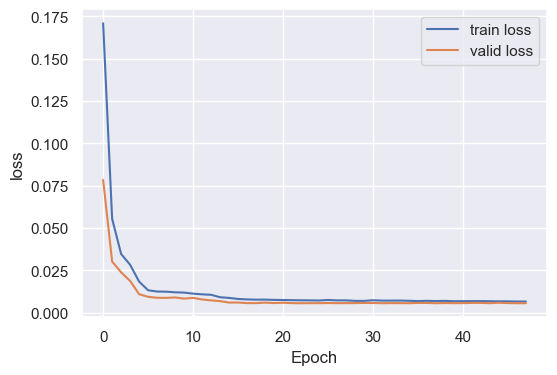

In [59]:
autoencoder = build_autoencoder(X,outer,inner,latent_vector,function,dropout_ratio)

history = train_autoencoder(autoencoder,X,batch,epoch,val,patience)

In [60]:
def reconstruction_loss(model,x_train,x_test):
    
    x_train_pred  = model.predict(x_train)
    x_test_pred = model.predict(x_test)
    
    train_mae_loss = np.mean(np.abs(x_train_pred - x_train), axis=1)
    test_mae_loss = np.mean(np.abs(x_test_pred - x_test), axis=1)

    print('\n')
    plt.figure(figsize=(6,4))
    plt.title('Reconstruction MAE Loss')
    plt.hist(train_mae_loss, bins=40,color='blue',density=True,label='Train')
    plt.hist(test_mae_loss, bins=40,color='red',density=True,label='Test')
    plt.legend()
    plt.show()

    threshold_train = np.max(train_mae_loss) 
    threshold_test = np.max(test_mae_loss) 
    print('\n')
    print("Train (Normal Only) Reconstruction error threshold:", threshold_train)
    print('\n')
    print("Test Reconstruction error threshold:", threshold_test)
    
    #anomalies = threshold_test > threshold_train
    #print('\n')
    #print("Train Threshold Based Detected Anomalies: ", np.sum(anomalies))
    #print("Real Normal Labels from Test Data : ", y_test.value_counts()[0])
    #print("Real Fault Labels from Test Data : ", y_test.value_counts()[1])
    
    return train_mae_loss, test_mae_loss, threshold_train, threshold_test

2/2 [==============================] - 0s 16ms/step




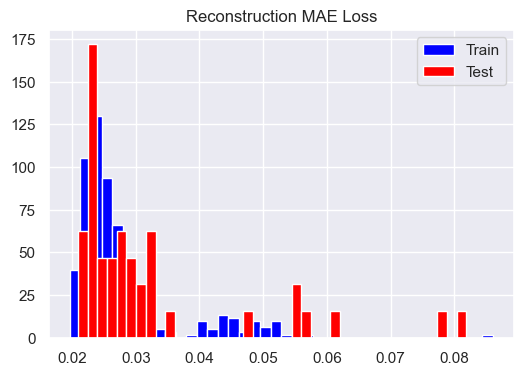



Train (Normal Only) Reconstruction error threshold: 0.08600738280366796


Test Reconstruction error threshold: 0.08189303396666249


In [61]:
train_mae_loss, test_mae_loss, threshold_train, threshold_test = reconstruction_loss(autoencoder,X_train_Normal,X_test)

In [62]:
def anomaly_threshold(threshold,model):
    test_score_df = pd.DataFrame(X_test[:])
    test_score_df['loss'] = test_mae_loss # --> pred_proba
    test_score_df['threshold'] = threshold # 레이블 예측 임계값 
    test_score_df['anomaly'] = test_score_df['loss'] > test_score_df['threshold']
    test_score_df['score'] = test_score_df["anomaly"].astype(int) # 예측 레이블 
    get_clf_eval(y_test,test_score_df['score'],test_score_df['loss'])
    print('\n')
    print(classification_report(y_test, test_score_df['score'],target_names=['양품','불량']))
    
    test_error = pd.DataFrame({'Reconstruction_error': test_mae_loss,'True_class': y_test.reset_index()['Y_Class']})

    plt.figure(figsize=(4, 3))
    plt.title(model, fontsize=12)
    plt.scatter(test_error.index[test_error['True_class'] == 0],test_error[test_error['True_class'] == 0]['Reconstruction_error'], s = 10, label = 'Normal')
    plt.scatter(test_error.index[test_error['True_class'] == 1],test_error[test_error['True_class'] == 1]['Reconstruction_error'], s = 10, label = 'Fault')
    plt.xlabel('Count', fontsize=10)
    plt.ylabel('Mean Absolute Error (MAE)', fontsize=10)
    plt.axhline(threshold,color = 'red', ls = '--', label = 'Threshold = %0.2f' % (threshold))
    plt.legend(bbox_to_anchor=(1.0, 1.03))
    plt.show()

Confusion Matrix
[[18  5]
 [ 4 15]]


정확도: 0.786 정밀도: 0.75 재현율: 0.789 AUC: 0.847 F1: 0.769 F2: 0.781 Balanced_Accuracy: 0.786


              precision    recall  f1-score   support

          양품       0.82      0.78      0.80        23
          불량       0.75      0.79      0.77        19

    accuracy                           0.79        42
   macro avg       0.78      0.79      0.78        42
weighted avg       0.79      0.79      0.79        42



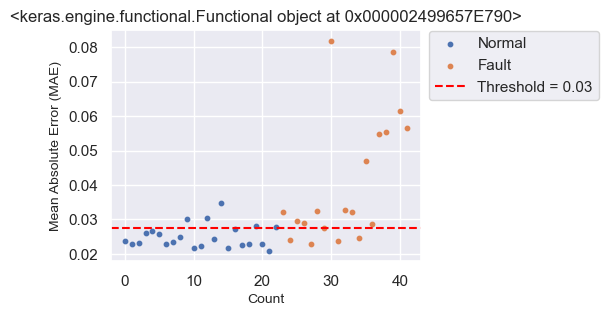

In [63]:
anomaly_threshold(threshold=0.0275,model=autoencoder)

In [64]:
#for i in range(0,len(test_mae_loss)):
    
    
#    anomaly_threshold(test_mae_loss[i],'Autoencoder')
#    print('threshold'+ ' = ' + str(test_mae_loss[i]))
#    print('-----------------------------------------------------------------------------------------')
#    print('\n')